<a href="https://colab.research.google.com/github/HuuDatDo/AI-project/blob/main/Simple_Graph_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import networkx as nx
import torch
import matplotlib.pyplot as plt

In [2]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 370 kB 9.8 MB/s 
     |████████████████████████████████| 482 kB 36.4 MB/s 
     |████████████████████████████████| 41 kB 299 kB/s 


In [8]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [20]:
#Visualization of graph
def visualize(h, color):
    plt.figure(figsize=(10,10))
    plt.xticks([])#
    plt.yticks([])

    nx.draw_networkx(G,pos=nx.spring_layout(G,seed=42), with_labels=True,node_color=color,cmap="Set2")
    plt.show()

In [10]:
data=dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


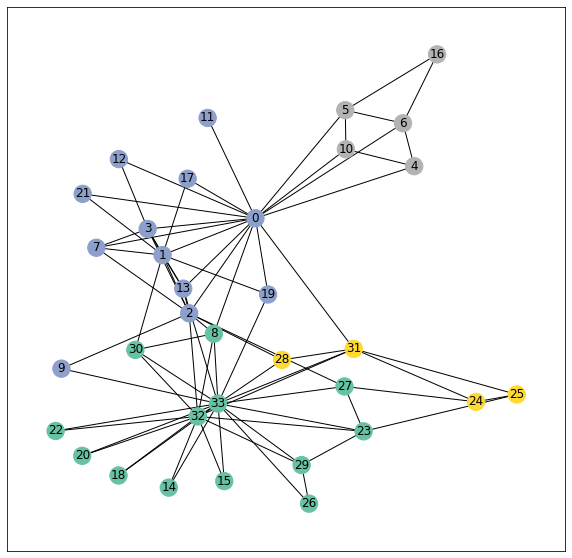

In [21]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(data,color=data.y)

In [25]:
import torch.nn as nn
import torch_geometric.nn as gnn

class GCN(nn.Module):
    def __init__ (self,in_channels,hidden_channels,out_channels):
        super(GCN,self).__init__()
        self.classifier=nn.Linear(out_channels,dataset.num_classes)
        self.gcn1=gnn.GCNConv(in_channels,hidden_channels)
        self.gcn2=gnn.GCNConv(hidden_channels,out_channels)
        self.activation=nn.Relu(inplace=False)
        self.dropout=nn.Dropout(p=0.2,inplace=False)

    def forward(self,x,adj):
        x=self.gcn1(x,adj)
        x=self.activation(x)
        x=self.dropout(x)
        x=self.gcn2(x,adj)
        x=self.classifier(x)
        x=nn.functional.log_softmax(x,dim=1)
        return x